In [1]:
#Import the necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Load the customer_value_analysis.csv into the variable customer_df.

In [2]:

customers = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')


First look at its main features (head, shape, info)

In [3]:

customers.head(20)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
customers.shape

(9134, 24)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

--------------
Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [6]:
customers.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

----------
Change effective to date column to datetime format.

In [8]:
customers['effective_to_date'] = pd.to_datetime(customers['effective_to_date'])
customers['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

----------
Check NaN values per column.

In [9]:


print(customers.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


 Define a functions that given an input dataframe, returns two dataframes: one with the numerical columns and another with categorical columns of the input dataframe.


In [10]:
def separate_cols (cus):
    num_cols = cus.select_dtypes(include=np.number).columns
    cat_cols = cus.select_dtypes(exclude=np.number).columns
    return cus[num_cols], cus[cat_cols]

In [11]:
num_cols, cat_cols = separate_cols(customers)

print(num_cols.info())
print(cat_cols.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer       

In [12]:
#Drop any ID column

In [13]:
customers2 = customers.copy()

In [14]:
def drop_id_col(customers2, id_col_name):
    if id_col_name in customers2.columns:
        customers2 = customers2.drop(id_col_name, axis=1)
    return customers2

customers2 = drop_id_col(customers2, 'customer')

In [15]:
customers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employmentstatus               9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premium_a

In [16]:
customers2.columns

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [17]:
customers.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

Get the correlation matrix for the numerical variables. What is pair of numerical variables that have the highest correlation? It makes sense, why?

In [18]:
corr_matrix = num_cols.corr()

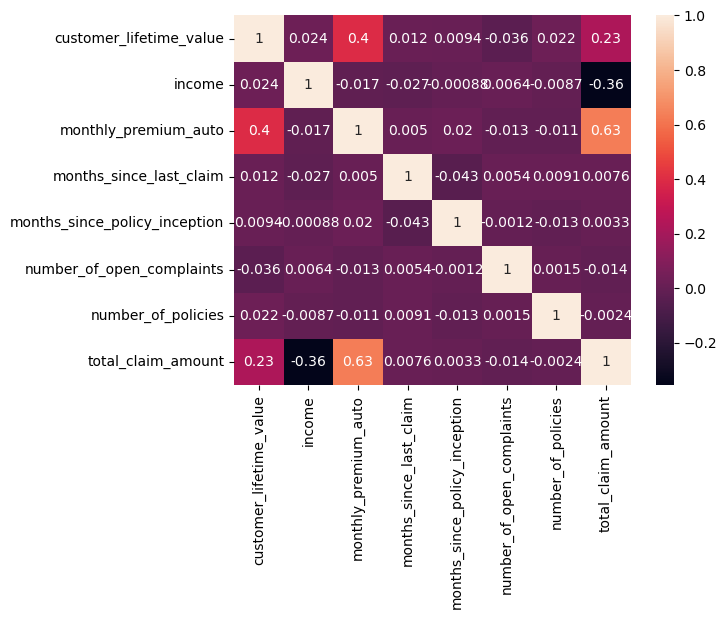

In [19]:
sns.heatmap(corr_matrix, annot =True)
plt.show()

In [20]:
max_correlation = corr_matrix.abs().unstack().sort_values(ascending =False).drop_duplicates()

In [21]:
# The highest pair of numerical variables will be the first entry in the sorted values.
print(max_correlation.head(2))

customer_lifetime_value  customer_lifetime_value    1.000000
total_claim_amount       monthly_premium_auto       0.632017
dtype: float64


----

---------------------
Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [22]:
def split_continuous_discrete(df, threshold=36):
    continuous_cols = []
    discrete_cols = []
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            if df[col].nunique() > threshold:
                continuous_cols.append(col)
            else: 
                discrete_cols.append(col)
    return df[continuous_cols],df[discrete_cols]
continuous_df, discrete_df = split_continuous_discrete(num_cols)


In [23]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_policy_inception  9134 non-null   int64  
 4   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 356.9 KB


In [24]:
discrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   months_since_last_claim    9134 non-null   int64
 1   number_of_open_complaints  9134 non-null   int64
 2   number_of_policies         9134 non-null   int64
dtypes: int64(3)
memory usage: 214.2 KB


--------------
Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

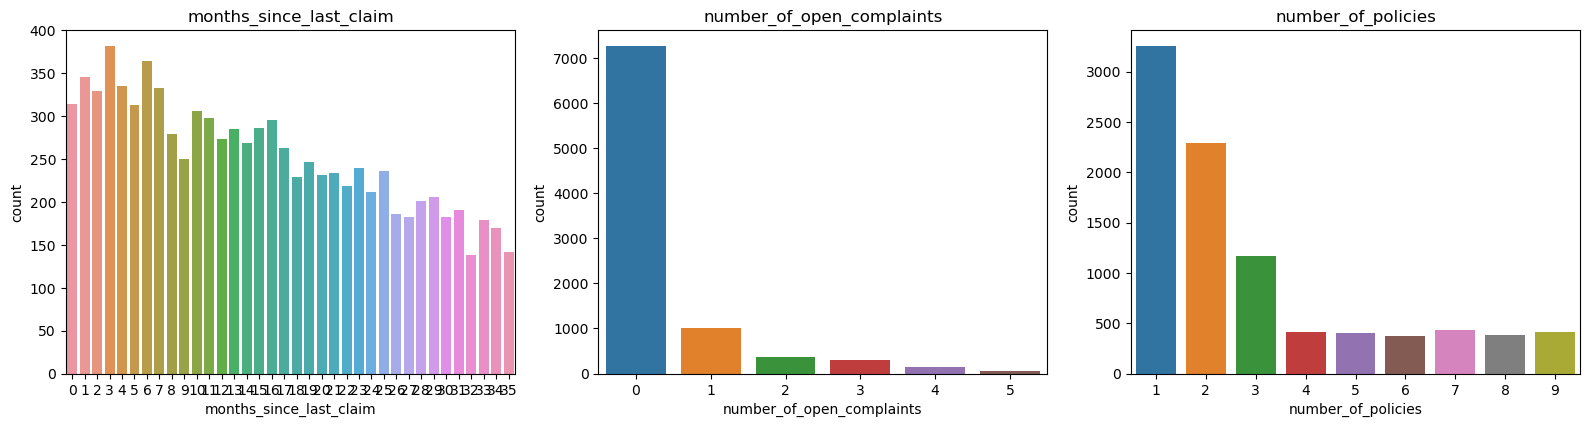

In [25]:
def plot_discrete_cols (df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate (df.columns):
        plt.subplot(4,3,i+1)
        sns.countplot(df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()
plot_discrete_cols(discrete_df)

-------------------
Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

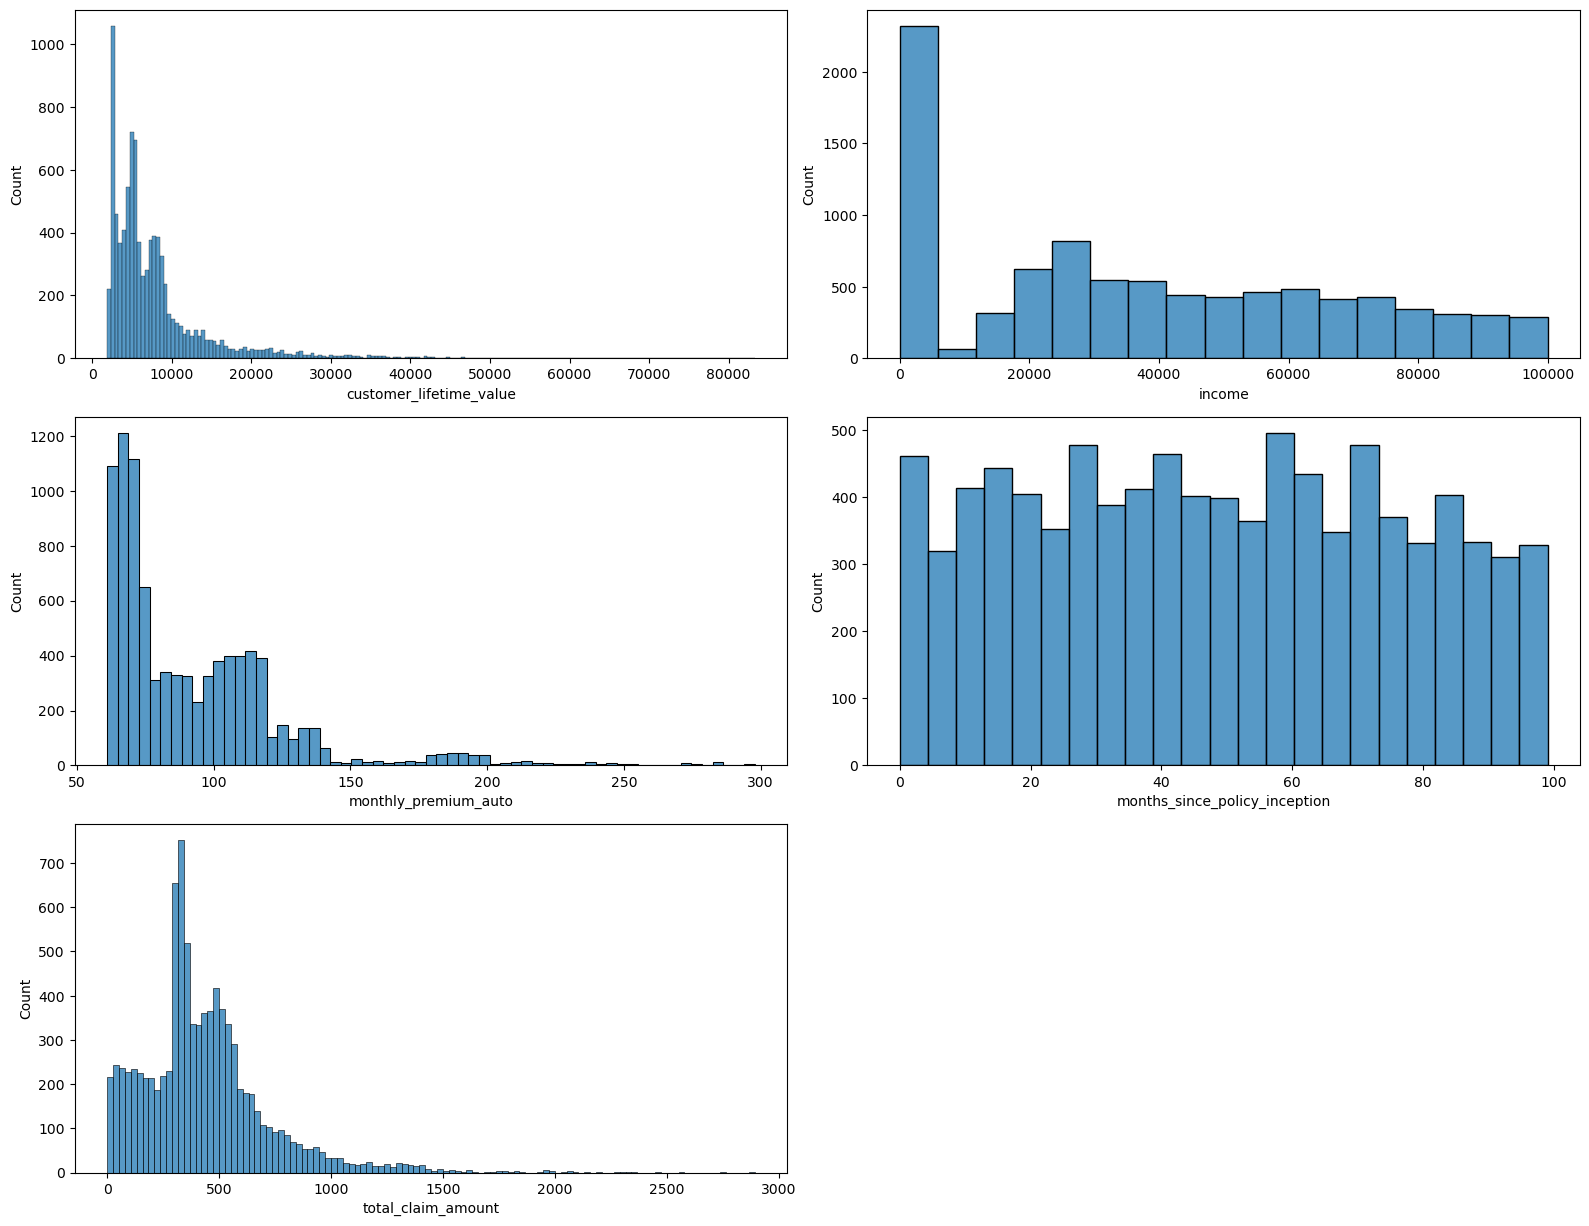

In [26]:
def plot_continuous_cols(df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate(df.columns):
        plt.subplot(4,2,i+1)
        sns.histplot(df[col])
        plt.tight_layout()
#         plt.show()
plot_continuous_cols(continuous_df)

------------
According to the previous histogram plots, do you think that you do will have to apply any transformation?

---------------
Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plots for the continuous_df.

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


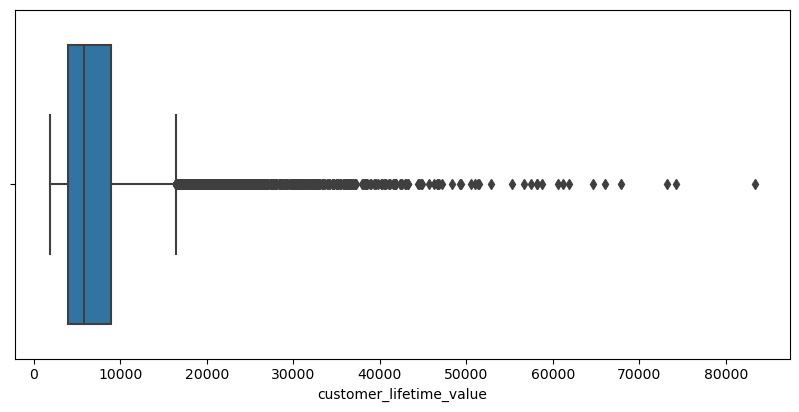

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


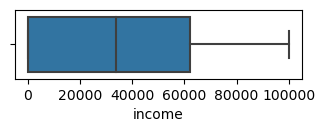

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


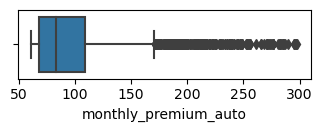

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


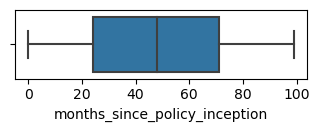

/Users/tracy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


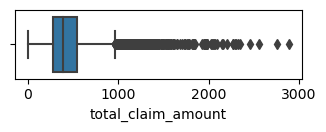

In [27]:
def plot_boxplots(df):
    plt.figure(figsize=(16,16))
    for i, col in enumerate(df.columns):
        plt.subplot(4,2,i+1)
        sns.boxplot(df[col])
        plt.tight_layout()
        plt.show()
plot_boxplots(continuous_df)



---------------------------
# Lab cleaning categorical data

1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column.

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
cat_columns = customers.select_dtypes(exclude=np.number).columns

In [30]:
cat_columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_cols(df):
    cat_columns =df.select_dtypes(exclude=np.number).columns
    plt.figure(figsize=(16,16))
    for i, col in enumerate(cat_columns):
        plt.subplot(4,4,i+1)
        if df[col].nunique() >=6:
            sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        else:
            sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.tight_layout()
    plt.show()

In [32]:
# plot_categorical_cols(customers)

--------------------------------
2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [33]:
customers3 = customers.copy()

In [34]:
customers3 = customers3.drop('policy_type', axis=1)

In [35]:
customers3['policy'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: policy
Non-Null Count  Dtype 
--------------  ----- 
9134 non-null   object
dtypes: object(1)
memory usage: 71.5+ KB


In [36]:
print(customers3['policy'].isnull().sum())

0


In [37]:
customers3['policy'] = pd.to_numeric(customers3['policy'], errors = 'coerce')
# customers3

In [38]:
def policy_transform(value):
    if value <=500:
        return "L1"
    elif value <=1000:
        return 'L2'
    else: 
        return "L3"

customers3["policy"] = customers3["policy"].apply(policy_transform)

In [39]:
print (customers3["policy"])

0       L3
1       L3
2       L3
3       L3
4       L3
        ..
9129    L3
9130    L3
9131    L3
9132    L3
9133    L3
Name: policy, Length: 9134, dtype: object


In [40]:
customers3["policy"].value_counts()

L3    9134
Name: policy, dtype: int64

In [41]:
customers3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

-----------------------------
3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

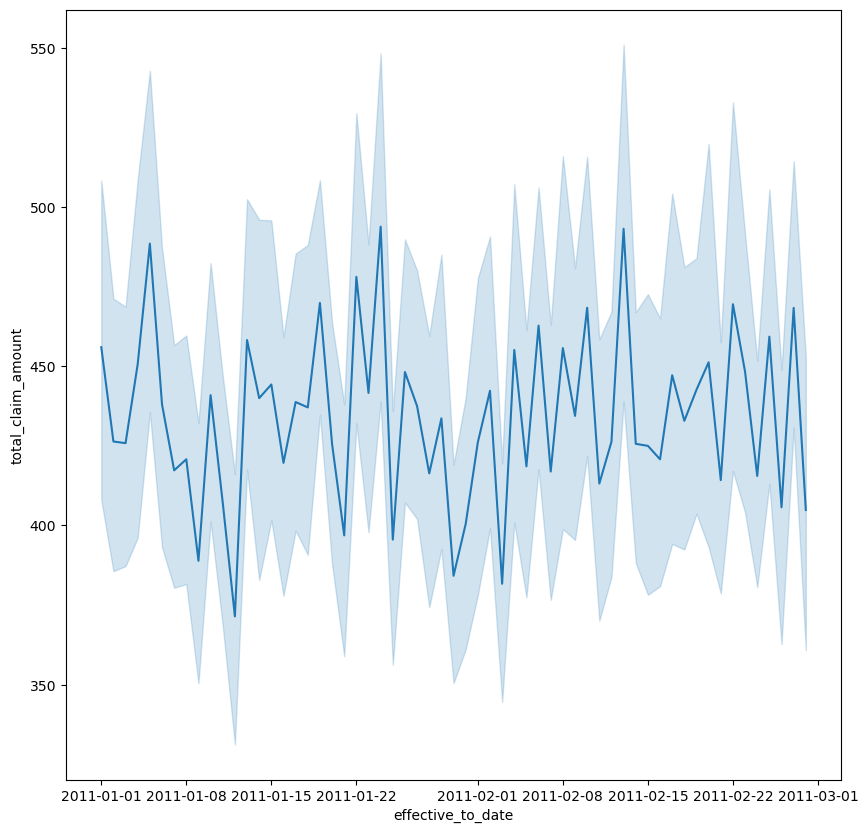

In [42]:
plt.figure(figsize=(10,10))
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customers3)
plt.show()

---------------
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:

day with the day number of effective_to_date

day_name with the day NAME of effective_to_date

week with the week of effective_to_date

month with the month NAME of effective_to_date

total_claim_amount with total_claim_amount

In [43]:
customers4 = pd.DataFrame()

In [44]:
customers4['day'] = customers3['effective_to_date'].dt.day

In [45]:
customers4['day_name'] = customers3['effective_to_date'].dt.day_name()

In [46]:
customers4['week'] = customers3['effective_to_date'].dt.isocalendar().week

In [47]:
customers4['month'] = customers3['effective_to_date'].dt.month_name()

In [48]:
customers4['total_claim_amount'] = customers3['total_claim_amount']

In [49]:
customers4.head()

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [50]:
customers3.head(50)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,L3,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,L3,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,14,94,0,2,L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,0,13,0,9,L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,0,68,0,4,L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,13,3,0,2,L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,17,7,0,8,L3,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [51]:
customers3['day_name'] = customers3['effective_to_date'].dt.day_name()

In [52]:
customers3.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy',
       'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'day_name'],
      dtype='object')

In [53]:
day_name_agg = customers3.groupby('day_name')['total_claim_amount'].sum().round(2)
day_name_agg

day_name
Friday       533658.79
Monday       655689.71
Saturday     608060.10
Sunday       581655.66
Thursday     541820.80
Tuesday      502518.93
Wednesday    541563.05
Name: total_claim_amount, dtype: float64

In [54]:
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
list_of_correct_days

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [55]:
day_name_add = day_name_agg.reindex(index=list_of_correct_days)
day_name_add

day_name
Monday       655689.71
Tuesday      502518.93
Wednesday    541563.05
Thursday     541820.80
Friday       533658.79
Saturday     608060.10
Sunday       581655.66
Name: total_claim_amount, dtype: float64

In [56]:
customers3.head(20)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day_name
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Thursday
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Monday
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Saturday
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,L3,Offer1,Call Center,529.881344,SUV,Medsize,Thursday
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,L3,Offer1,Agent,138.130879,Four-Door Car,Medsize,Thursday
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,L3,Offer2,Web,159.383042,Two-Door Car,Medsize,Tuesday
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,13,0,9,L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,Thursday
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,68,0,4,L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,Tuesday
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,3,0,2,L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,Wednesday
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,7,0,8,L3,Offer2,Branch,425.527834,Four-Door Car,Medsize,Thursday


6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

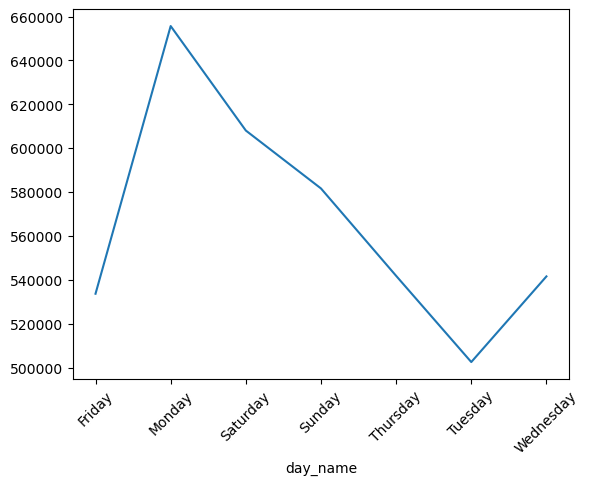

In [57]:
sns.lineplot(x=day_name_agg.index, y=day_name_agg.values)
plt.xticks(rotation=45)
plt.show()

7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [58]:
day_name_agg = customers3.groupby('day_name')['total_claim_amount'].count()

day_name_agg 

day_name
Friday       1245
Monday       1530
Saturday     1397
Sunday       1330
Thursday     1249
Tuesday      1162
Wednesday    1221
Name: total_claim_amount, dtype: int64

In [59]:
list_of_correct_values = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
list_of_correct_values

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [60]:
day_name_agg = day_name_agg.reindex(index=list_of_correct_values)
day_name_agg 

day_name
Monday       1530
Tuesday      1162
Wednesday    1221
Thursday     1249
Friday       1245
Saturday     1397
Sunday       1330
Name: total_claim_amount, dtype: int64

8 .Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [61]:
median_by_day = customers3.groupby('day_name').median().reset_index()
median_by_day

,day_name,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Friday,5714.232848,35173.0,86.0,14.0,48.0,0.0,2.0,371.803029
1,Monday,5757.442258,34263.5,80.0,14.0,50.0,0.0,2.0,385.735705
2,Saturday,5768.091295,34628.0,83.0,14.0,47.0,0.0,2.0,379.200000
3,Sunday,5882.255697,36064.0,83.0,14.0,48.0,0.0,2.0,383.721164
4,Thursday,5898.733666,34498.0,83.0,14.0,48.0,0.0,2.0,395.328407
5,Tuesday,5735.775545,33190.0,83.0,14.0,48.0,0.0,2.0,378.490829
6,Wednesday,5715.787663,29834.0,82.0,15.0,46.0,0.0,2.0,392.235698


In [62]:
median_by_day.sort_values('total_claim_amount', ascending=False, inplace=True)
print (median_by_day)

    day_name  customer_lifetime_value   income  monthly_premium_auto  \
4   Thursday              5898.733666  34498.0                  83.0   
6  Wednesday              5715.787663  29834.0                  82.0   
1     Monday              5757.442258  34263.5                  80.0   
3     Sunday              5882.255697  36064.0                  83.0   
2   Saturday              5768.091295  34628.0                  83.0   
5    Tuesday              5735.775545  33190.0                  83.0   
0     Friday              5714.232848  35173.0                  86.0   

   months_since_last_claim  months_since_policy_inception  \
4                     14.0                           48.0   
6                     15.0                           46.0   
1                     14.0                           50.0   
3                     14.0                           48.0   
2                     14.0                           47.0   
5                     14.0                           48.0

9. Plot the median "target" by day of the week name using a seaborn barplot

<AxesSubplot:xlabel='day_name', ylabel='total_claim_amount'>

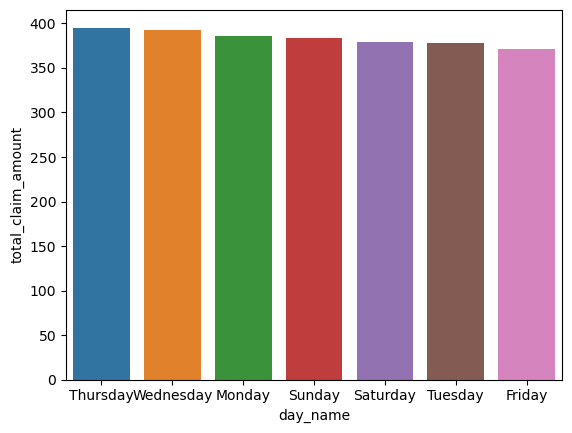

In [63]:
sns.barplot(x='day_name', y='total_claim_amount', data=median_by_day)


10. What can you conclude from this analysis?

the total claim amount is not really different on weekdays from Monday to Friday. Thurdays is the highest and Firday is lowest. 

11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [64]:
customers3['month'] = customers3['effective_to_date'].dt.month_name()

In [65]:
monthly_agg = customers3.groupby('month')['total_claim_amount'].sum().round(2)

In [66]:
list_of_correct_values = ['January','February','March','April','May','June','July','August','September','October','November','December']


In [67]:
month_agg = monthly_agg.reindex(index=list_of_correct_values)

In [68]:
month_agg

month
January      2117142.86
February     1847824.19
March               NaN
April               NaN
May                 NaN
June                NaN
July                NaN
August              NaN
September           NaN
October             NaN
November            NaN
December            NaN
Name: total_claim_amount, dtype: float64

12. Can you do a monthly analysis given the output of the previous series? Why?

I cannot do a monthly analysis given the output of the previous series. Because the input is just only January and February.

13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [69]:
def remove_outliers(df, column, thr=3):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - thr * std
    upper_bound = mean + thr * std
    
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    
    
    

14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [70]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_policy_inception  9134 non-null   int64  
 4   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 356.9 KB


In [71]:
continous_clean_df = remove_outliers(continuous_df, 'total_claim_amount')
continous_clean_df 

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [72]:
continous_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8976 entries, 0 to 9133
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        8976 non-null   float64
 1   income                         8976 non-null   int64  
 2   monthly_premium_auto           8976 non-null   int64  
 3   months_since_policy_inception  8976 non-null   int64  
 4   total_claim_amount             8976 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 420.8 KB


15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.m

In [73]:
concat_df = pd.concat([continous_clean_df, discrete_df, cat_cols, customers3[['effective_to_date']]], axis=1)
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,BU79786,Washington,...,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,QZ44356,Arizona,...,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,AI49188,Nevada,...,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,WW63253,California,...,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,HB64268,Washington,...,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,NaN,NaN,NaN,NaN,NaN,23,0,1,VF65251,California,...,M,Suburban,Single,Personal Auto,Personal L2,Offer4,Branch,Luxury SUV,Large,2011-01-03
8943,NaN,NaN,NaN,NaN,NaN,21,0,7,FM12425,California,...,M,Suburban,Divorced,Personal Auto,Personal L2,Offer1,Web,Luxury SUV,Medsize,2011-02-08
9049,NaN,NaN,NaN,NaN,NaN,4,1,2,UZ14076,California,...,F,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Luxury SUV,Large,2011-02-16
9103,NaN,NaN,NaN,NaN,NaN,24,0,4,CZ57208,California,...,F,Suburban,Single,Personal Auto,Personal L3,Offer1,Agent,Luxury SUV,Large,2011-01-01


In [74]:
concat_df = concat_df.dropna().reset_index(drop=True)
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,...,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,BU79786,Washington,...,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,QZ44356,Arizona,...,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,AI49188,Nevada,...,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,WW63253,California,...,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,HB64268,Washington,...,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,LA72316,California,...,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10
8972,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,PK87824,California,...,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12
8973,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,TD14365,California,...,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06
8974,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,UP19263,California,...,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011-02-03


16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [75]:
cols = concat_df.columns.tolist()
cols.remove('total_claim_amount')
cols.append('total_claim_amount')
concat_df = concat_df[cols]

In [76]:
concat_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,customer,state,response,...,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_to_date,effective_to_date,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,BU79786,Washington,No,...,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-24,2011-02-24,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,QZ44356,Arizona,No,...,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01-31,2011-01-31,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,AI49188,Nevada,No,...,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02-19,2011-02-19,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,WW63253,California,No,...,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01-20,2011-01-20,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,HB64268,Washington,No,...,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011-02-03,2011-02-03,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,18,0,2,LA72316,California,No,...,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,2011-02-10,2011-02-10,198.234764
8972,3096.511217,21604.0,79.0,28.0,14,0,1,PK87824,California,Yes,...,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011-02-12,2011-02-12,379.200000
8973,8163.890428,0.0,85.0,37.0,9,3,2,TD14365,California,No,...,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011-02-06,2011-02-06,790.784983
8974,7524.442436,21941.0,96.0,3.0,34,0,3,UP19263,California,No,...,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,2011-02-03,2011-02-03,691.200000


17.Turn the response column values into (Yes=1/No=0).

In [77]:
concat_df ['response'].head(5)

0    No
1    No
2    No
3    No
4    No
Name: response, dtype: object

In [78]:
def response_to_binary(x):
    if x =='Yes':
        return 1
    else:
        return 0
    
concat_df.loc[:,'response'] = concat_df['response'].apply(response_to_binary)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/2893629610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df.loc[:,'response'] = concat_df['response'].apply(response_to_binary)


In [79]:
concat_df ['response'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [80]:
concat_df ['education'].head(10)

0    Bachelor
1    Bachelor
2    Bachelor
3    Bachelor
4    Bachelor
5    Bachelor
6     College
7      Master
8    Bachelor
9     College
Name: education, dtype: object

In [81]:
def group_education(x):
    if x in ['Master','Doctor']:
        return "Graduate"
    else: 
        return x
concat_df['education'] = concat_df['education'].apply(group_education)


/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/729597302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['education'] = concat_df['education'].apply(group_education)


In [82]:
concat_df['education'].head(20)

0                 Bachelor
1                 Bachelor
2                 Bachelor
3                 Bachelor
4                 Bachelor
5                 Bachelor
6                  College
7                 Graduate
8                 Bachelor
9                  College
10                 College
11                 College
12                Graduate
13    High School or Below
14                 College
15                Bachelor
16    High School or Below
17                 College
18                 College
19    High School or Below
Name: education, dtype: object

19.Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [83]:
concat_df['employmentstatus'].head(10)

0         Employed
1       Unemployed
2         Employed
3       Unemployed
4         Employed
5         Employed
6         Employed
7       Unemployed
8    Medical Leave
9         Employed
Name: employmentstatus, dtype: object

In [84]:
def reduce_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled','Retired']:
        return "Inactive"
    else:
        return x
concat_df['employmentstatus']= concat_df['employmentstatus'].apply(reduce_employmentstatus)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/3808416839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['employmentstatus']= concat_df['employmentstatus'].apply(reduce_employmentstatus)


In [85]:
concat_df['employmentstatus'].head(20)

0       Employed
1     Unemployed
2       Employed
3     Unemployed
4       Employed
5       Employed
6       Employed
7     Unemployed
8       Inactive
9       Employed
10    Unemployed
11    Unemployed
12      Employed
13      Employed
14      Employed
15      Employed
16      Inactive
17      Inactive
18      Employed
19      Employed
Name: employmentstatus, dtype: object

20. Deal with column Gender turning the values into (1/0).

In [86]:
concat_df['gender']

0       F
1       F
2       F
3       M
4       M
       ..
8971    M
8972    F
8973    M
8974    M
8975    M
Name: gender, Length: 8976, dtype: object

In [87]:
def gender_to_binary(x):
    if x=="F":
        return 0
    else:
        return 1
concat_df.loc[:,'gender'] = concat_df['gender'].apply(gender_to_binary)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/2246826656.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df.loc[:,'gender'] = concat_df['gender'].apply(gender_to_binary)


In [88]:
concat_df['gender']

0       0
1       0
2       0
3       1
4       1
       ..
8971    1
8972    0
8973    1
8974    1
8975    1
Name: gender, Length: 8976, dtype: int64

21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [89]:
concat_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [90]:
concat_df['vehicle_class'] = np.where(concat_df['vehicle_class'].isin(["Sport Car", "Luxury SUV","Luxury Car"]),'Luxury',concat_df['vehicle_class'])




/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/4262405678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['vehicle_class'] = np.where(concat_df['vehicle_class'].isin(["Sport Car", "Luxury SUV","Luxury Car"]),'Luxury',concat_df['vehicle_class'])


In [91]:
concat_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury', 'Sports Car'],
      dtype=object)

22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic"

In [92]:
concat_df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [93]:
coverage_mapping = {'Premium':3, 'Extended':2, 'Basic':1}

In [94]:
concat_df['coverage'] = concat_df['coverage'].map(coverage_mapping)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/2458599417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['coverage'] = concat_df['coverage'].map(coverage_mapping)


In [95]:
concat_df['coverage'].unique()

array([1, 2, 3])

23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [96]:
concat_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [97]:
employment_mapping = {"Employed":2, "Inactive":1, "Unemployed":0}

In [98]:
concat_df['employmentstatus'] =concat_df ['employmentstatus'].map(employment_mapping)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/3679049996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['employmentstatus'] =concat_df ['employmentstatus'].map(employment_mapping)


In [99]:
concat_df['employmentstatus'].unique()

array([2, 0, 1])

24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [100]:
concat_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [101]:
location_mapping = {'Urban':2, 'Suburban':1, 'Rural':0}

In [102]:
concat_df['location_code']= concat_df['location_code'].map(location_mapping)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/1536256046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['location_code']= concat_df['location_code'].map(location_mapping)


In [103]:
concat_df['location_code'].unique()

array([1, 0, 2])

25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [104]:
concat_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [105]:
mapping = {"Large":2, "Medsize":1, "Small":0}

In [106]:
concat_df['vehicle_size'] = concat_df['vehicle_size'].map(mapping)

/var/folders/v0/dptd1l097cx_4zqpm8ddy2rm0000gn/T/ipykernel_665/1151448132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_df['vehicle_size'] = concat_df['vehicle_size'].map(mapping)


In [107]:
concat_df['vehicle_size'].unique()

array([1, 0, 2])

26. Get a dataframe with the categorical nominal columns

In [108]:
nominal_df = concat_df.select_dtypes(include=[object])

In [109]:
nominal_df

,customer,state,education,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,BU79786,Washington,Bachelor,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,QZ44356,Arizona,Bachelor,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,AI49188,Nevada,Bachelor,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,WW63253,California,Bachelor,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,HB64268,Washington,Bachelor,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...
8971,LA72316,California,Bachelor,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car
8972,PK87824,California,College,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car
8973,TD14365,California,Bachelor,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car
8974,UP19263,California,College,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car


27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

In [110]:
nominal_cols = ['customer','state','education','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']

levels = []

for col in nominal_cols:
    levels.append(concat_df[col].unique().tolist())


In [111]:
display (levels)

[['BU79786',
  'QZ44356',
  'AI49188',
  'WW63253',
  'HB64268',
  'OC83172',
  'XZ87318',
  'CF85061',
  'DY87989',
  'BQ94931',
  'SX51350',
  'VQ65197',
  'DP39365',
  'SJ95423',
  'IL66569',
  'BW63560',
  'FV94802',
  'OE15005',
  'WC83389',
  'FL50705',
  'ZK25313',
  'SV62436',
  'YH23384',
  'TZ98966',
  'HM55802',
  'FS42516',
  'US89481',
  'HO30839',
  'GE62437',
  'EJ77678',
  'SV85652',
  'UL64533',
  'PF41800',
  'AO98601',
  'SK67821',
  'YV55495',
  'KY38074',
  'DM79012',
  'CM61827',
  'WC35801',
  'QG25316',
  'MB98372',
  'IL19217',
  'SR38658',
  'DH41343',
  'HG65722',
  'BU27331',
  'XM45289',
  'KP34198',
  'SH90947',
  'WE95729',
  'PY51963',
  'RB69909',
  'XR95069',
  'FR46645',
  'SY17488',
  'AP67935',
  'FS37417',
  'ML29312',
  'UB61619',
  'CD86811',
  'RU83859',
  'FG63582',
  'NN71951',
  'WB37082',
  'SM52139',
  'FL82372',
  'DP45816',
  'GW33762',
  'RZ33670',
  'PY70169',
  'MO91628',
  'HW87852',
  'HB20453',
  'BN87372',
  'YX23800',
  'DZ87709',

28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [112]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first', categories=levels)

In [113]:
onehot_encoder 

OneHotEncoder(categories=[['BU79786', 'QZ44356', 'AI49188', 'WW63253',
                           'HB64268', 'OC83172', 'XZ87318', 'CF85061',
                           'DY87989', 'BQ94931', 'SX51350', 'VQ65197',
                           'DP39365', 'SJ95423', 'IL66569', 'BW63560',
                           'FV94802', 'OE15005', 'WC83389', 'FL50705',
                           'ZK25313', 'SV62436', 'YH23384', 'TZ98966',
                           'HM55802', 'FS42516', 'US89481', 'HO30839',
                           'GE62437', 'EJ77678', ...],
                          ['Washington', 'Ari...
                           'High School or Below'],
                          ['Married', 'Single', 'Divorced'],
                          ['Corporate Auto', 'Personal Auto', 'Special Auto'],
                          ['Corporate L3', 'Personal L3', 'Corporate L2',
                           'Personal L1', 'Special L2', 'Corporate L1',
                           'Personal L2', 'Special L1', 'Spec